In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Attribute Information

`Item_Identifier :-`  Idetifies the Item/prdouct from the dataset (Nominal Feature )

`Item_Weight :-` Indicates weight of the Item/product (Continuous feature)

`Item_Fat_Content :-` Indicates the low fat and regular item/product (Ordinal Feature)

`Item_Visibility :-` Item visibility % in store (Continuous Feature)

`Item_Type :-` Contains type of the item like Dairy, Soft Drinks, Meat, Fruits and Vegetables,Household,Baking Goods,Snack Foods,Frozen Foods,Breakfast (Nominal   Feature)

`Item_MRP :-` Contains price of the items (Continuous valus)

`Outlet_Identifier :-` Alphanumeric code assign to outlet to identify the outlets (Nominal Feature) 

`Outlet_Establishment_Year :-` Establishment year of the outlets (Ordinal Feature)

`Outlet_Size :-` contains values like High,Low & Medium (Ordinal Feature)

`Outlet_Location_Type :-` Contains locations info like Tier1, Tier2 (Nominal Feature)

`Outlet_Type :-` Type of the outlets Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3 (Ordinal Feature)

`Item_Outlet_Sales :-` sales amount (Continuous feature)

In [38]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df,title="Profiling Report")
# profile.to_file(output_file="report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 178.56it/s]


### Data Cleaning

In [3]:
df.sample(10) # Sample Random data 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3151,NCO30,19.500,Low Fat,0.015814,Household,183.2608,OUT017,2007,NaN,Tier 2,Supermarket Type1,2940.1728
5598,FDO52,11.600,Regular,0.077150,Frozen Foods,170.2106,OUT035,2004,Small,Tier 2,Supermarket Type1,1882.2166
4364,FDR21,19.700,Low Fat,0.067040,Snack Foods,178.3370,OUT049,1999,Medium,Tier 1,Supermarket Type1,1411.4960
5514,FDW02,4.805,Regular,0.037699,Dairy,125.5704,OUT046,1997,Small,Tier 1,Supermarket Type1,3880.2824
7425,FDB26,NaN,Regular,0.031116,Canned,55.2640,OUT027,1985,Medium,Tier 3,Supermarket Type3,1544.6560
7073,FDK46,9.600,Low Fat,0.051677,Snack Foods,258.0620,OUT018,2009,Medium,Tier 3,Supermarket Type2,2856.2820
7461,FDM14,13.800,Low Fat,0.013261,Canned,108.0254,OUT035,2004,Small,Tier 2,Supermarket Type1,759.6778
4973,FDT50,6.750,Regular,0.000000,Dairy,96.7752,OUT049,1999,Medium,Tier 1,Supermarket Type1,1342.2528
492,NCP42,8.510,Low Fat,0.016202,Household,195.2478,OUT017,2007,NaN,Tier 2,Supermarket Type1,4262.4516
7052,FDT52,9.695,Regular,0.047623,Frozen Foods,246.2144,OUT018,2009,Medium,Tier 3,Supermarket Type2,3675.2160


In [4]:
df.info() # information about the data-types for the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
print("Number of Rows in dataset :",df.shape[0])
print("Number of Columns in dataset :",df.shape[1])

Number of Rows in dataset : 8523
Number of Columns in dataset : 12


In [7]:
df[df.duplicated()] # checking the duplicated values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [8]:
df['Item_Fat_Content'].unique()

# We will combine the Low Fat , low fat ,LF into Low Fat & reg,Regular to Regular

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [10]:
# Lets convert Outlet_Establishment_Year to object datatype columns

df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

### Exploratory Data Analysis

In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O'] # identifying the Categorical Feature
num_features = [feature for feature in df.columns if df[feature].dtype != 'O'] # identifying the Numerical Feature

In [12]:
num_df = df[num_features]
num_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [13]:
cat_df = df[cat_features]
cat_df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,2009,Medium,Tier 3,Supermarket Type2


### Univariate Analysis

#### Categorical Features

##### Item_Identifier

In [14]:
df['Item_Identifier'].nunique()

1559

<i>`Observation :`</i>

1.  No Null values

2. Total unique products are 1559

##### Item_Fat_Content

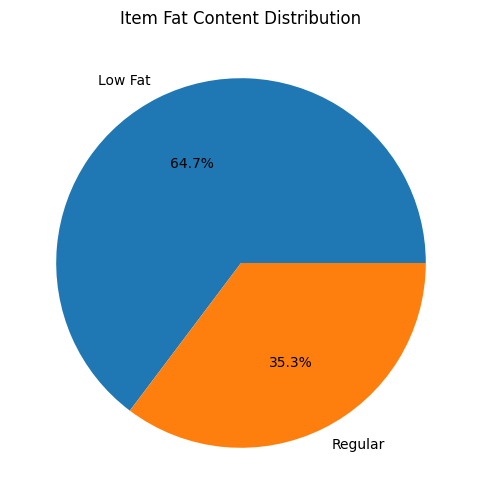

In [15]:

plt.figure(figsize=(6,6))
plt.pie(df['Item_Fat_Content'].value_counts(),labels=df['Item_Fat_Content'].unique(),autopct='%1.1f%%')
plt.title("Item Fat Content Distribution")
plt.show()

<i>`Observation :`</i>

1.  No Null values

2. Low fat contents items (64.7%)  more popular in consumer compared to Regular content items (35.3%).

##### Item_Type

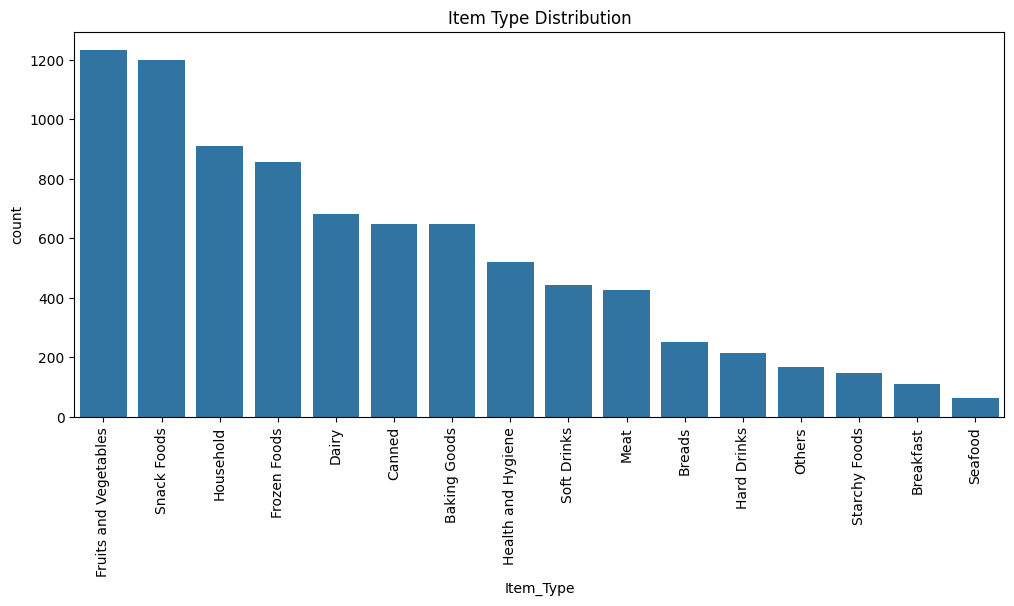

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(df['Item_Type'].value_counts().sort_values(ascending=False))
plt.xticks(rotation=90)
plt.title("Item Type Distribution")
plt.show()

<i>`Observation :`</i>

1. No Null values

2.  From above chart, we can observe that Fruits and vegetables are most consumed followed by snack foods and Houshold items.

##### Outlet_Identifier

In [17]:
df['Outlet_Identifier'].nunique()

10

`Observation :`

1. No Null Values

2. We have total 10 Unique store ID.

##### Outlet_Establishment_Year

In [18]:
df['Outlet_Establishment_Year'].isnull().sum()

0

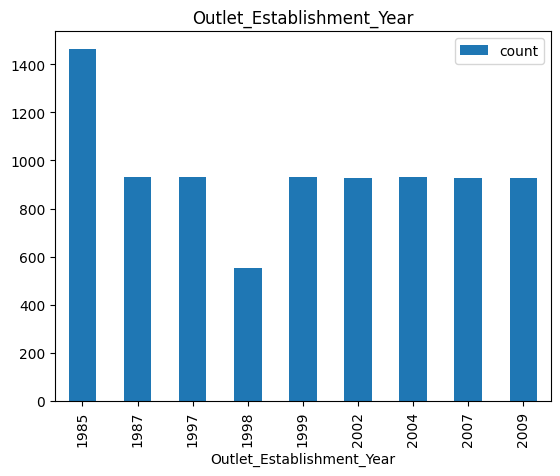

In [19]:
df['Outlet_Establishment_Year'].value_counts().to_frame().sort_values(by='Outlet_Establishment_Year').plot(kind='bar')
plt.title("Outlet_Establishment_Year")
plt.show()

<i>`Observation :`</i>

1. No Null values
2. From above chart, most of the sales in outlets had been established on 1985,since then there is decrease in outlet establishment , major fall was in 1998

##### Outlet_Size

In [20]:
df['Outlet_Size'].isnull().sum()

2410

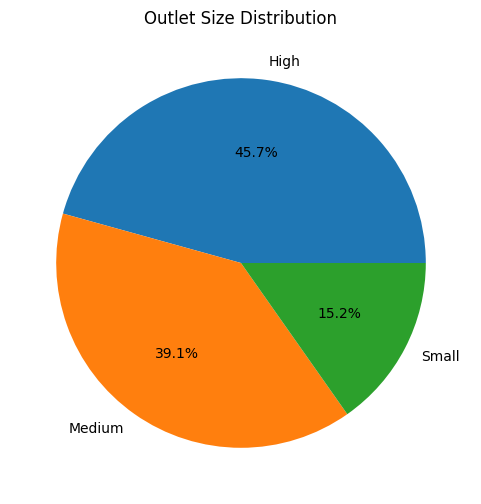

In [21]:
outlet_size = ['High','Medium','Small']
plt.figure(figsize=(6,6))
plt.pie(df['Outlet_Size'].value_counts(),labels=outlet_size,autopct='%1.1f%%')
plt.title("Outlet Size Distribution")
plt.show()

<i>`Observation :`</i>

1. We have total 2410 null values in the Outlet_Size feature, we will to impute the missing values.
2. From above chart, we can see that bigger outlet size has more cosumption of the product , wherein medium has less consumption followed by Small Outlet Size

##### Outlet_Location_Type

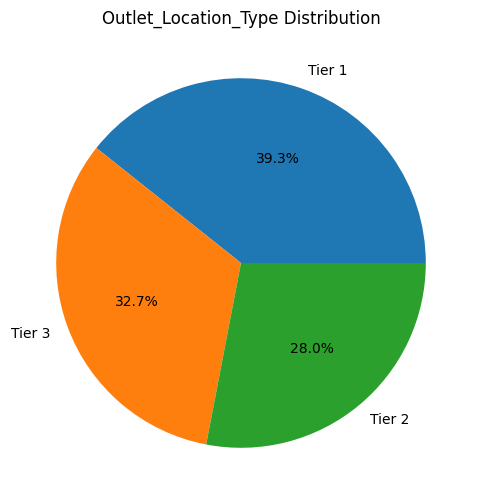

In [22]:
plt.figure(figsize=(6,6))
plt.pie(df['Outlet_Location_Type'].value_counts(),labels=df['Outlet_Location_Type'].unique(),autopct='%1.1f%%')
plt.title("Outlet_Location_Type Distribution")
plt.show()


`Observation :`

1. No Null Values 

2. From above chart , we can observe that most of the Sales happened Tier 1 (39.3%) locations followed by Tier 3 (32.7%) , however there is less consumption in Tier 2 (28%)

##### Outlet_Type

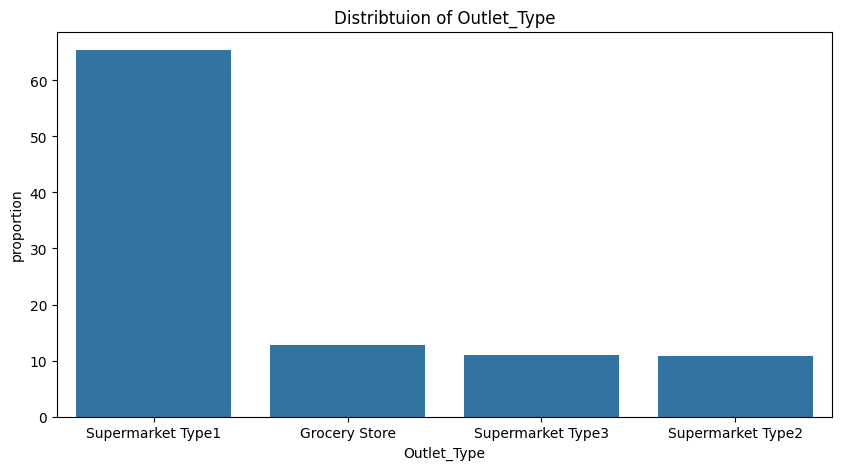

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(df['Outlet_Type'].value_counts(normalize=True)*100)
plt.title("Distribtuion of Outlet_Type")
plt.show()

`Observations :`

1. No null values

2. Above chart , shows that Supermarket Type 1 outlet is most poular followed by Grocery store, Supermarket type 2 and 3 are less popular 

#### Numerical Features

##### Item_Weight

In [24]:
print("Five Number Summary")
print()
print("Minimum Item Weight :",df['Item_Weight'].min())
print("Q1 :",df['Item_Weight'].quantile(0.25))
print("Mean of the Item_Weight :",df['Item_Weight'].mean())
print("Q3 :",df['Item_Weight'].quantile(0.75))
print("Maximum Item Weight :",df['Item_Weight'].max())

Five Number Summary

Minimum Item Weight : 4.555
Q1 : 8.77375
Mean of the Item_Weight : 12.857645184135976
Q3 : 16.85
Maximum Item Weight : 21.35


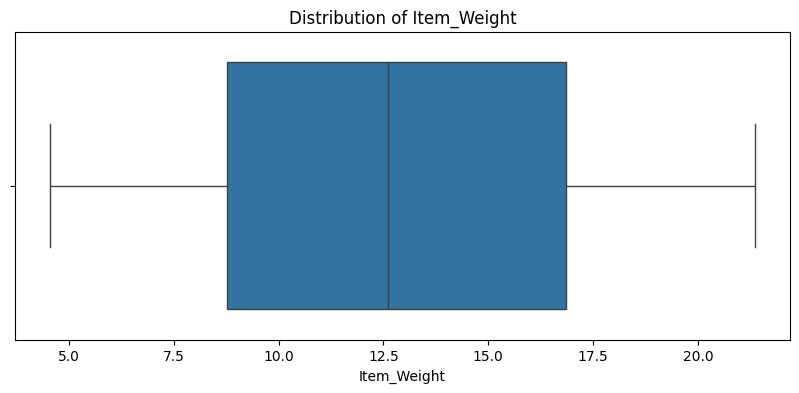

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(x=df['Item_Weight'])
plt.title("Distribution of Item_Weight")
plt.show()


##### Item_Visibility

In [26]:
print("Five Number Summary")
print()
print("Minimum Item_Visibility :",df['Item_Visibility'].min())
print("Q1 :",df['Item_Visibility'].quantile(0.25))
print("Mean of the Item_Visibility :",df['Item_Visibility'].mean())
print("Q3 :",df['Item_Visibility'].quantile(0.75))
print("Maximum Item_Visibility :",df['Item_Visibility'].max())

Five Number Summary

Minimum Item_Visibility : 0.0
Q1 : 0.0269894775
Mean of the Item_Visibility : 0.06613202877895108
Q3 : 0.0945852925
Maximum Item_Visibility : 0.328390948


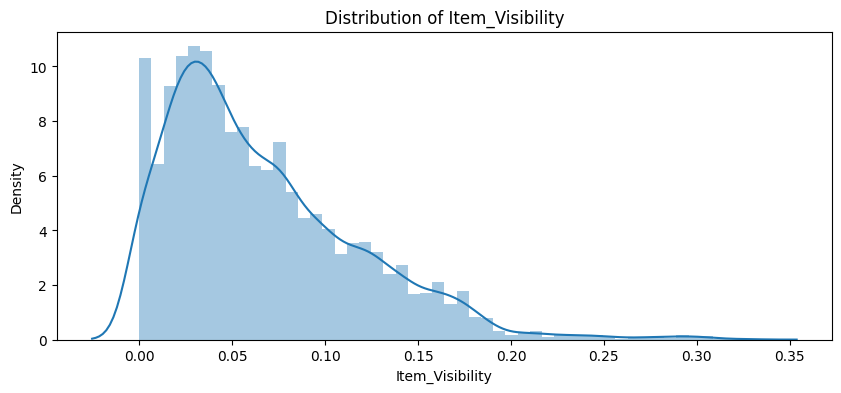

In [27]:
plt.figure(figsize=(10,4))
sns.distplot(df['Item_Visibility'])
plt.title("Distribution of Item_Visibility")
plt.show()

`Observation :`

1. No null values 

2. From above chart we found that item_visibility distribution is Right Skewed

##### Item_MRP

In [28]:
print("Five Number Summary")
print()
print("Minimum Item_MRP :",df['Item_MRP'].min())
print("Q1 :",df['Item_MRP'].quantile(0.25))
print("Mean of the Item_MRP :",df['Item_MRP'].mean())
print("Q3 :",df['Item_MRP'].quantile(0.75))
print("Maximum Item_MRP :",df['Item_MRP'].max())

Five Number Summary

Minimum Item_MRP : 31.29
Q1 : 93.8265
Mean of the Item_MRP : 140.9927819781767
Q3 : 185.6437
Maximum Item_MRP : 266.8884


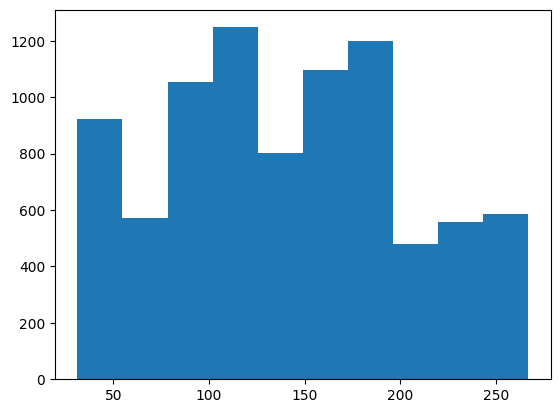

In [29]:
plt.hist(df['Item_MRP'],bins=10)
plt.show()

`Observation :`

1. No Null Values
2. Most of the Items MRP is ranging between 90 to 200

##### Item_Outlet_Sales

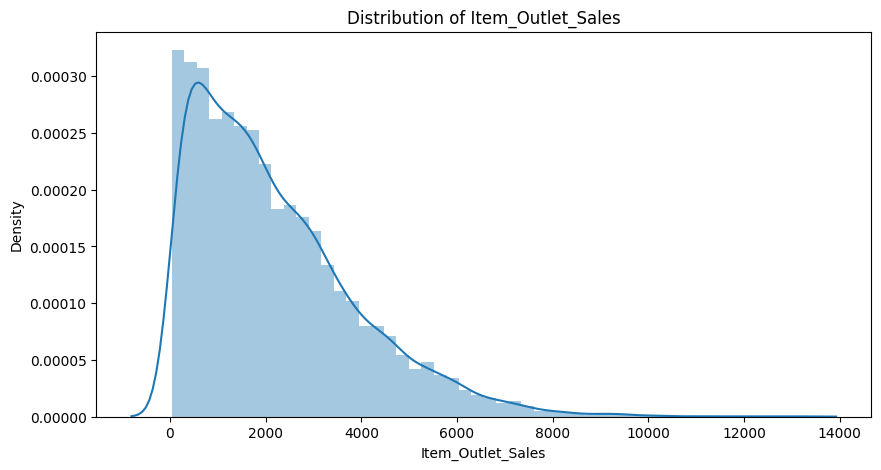

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df['Item_Outlet_Sales'])
plt.title("Distribution of Item_Outlet_Sales")
plt.show()

`Observation :`

1. No Null Values
2. Distribution of Item_Outlet_Sales is Right Skewed

### Multivariate Analysis

#### Understanding the Sales with categorical features

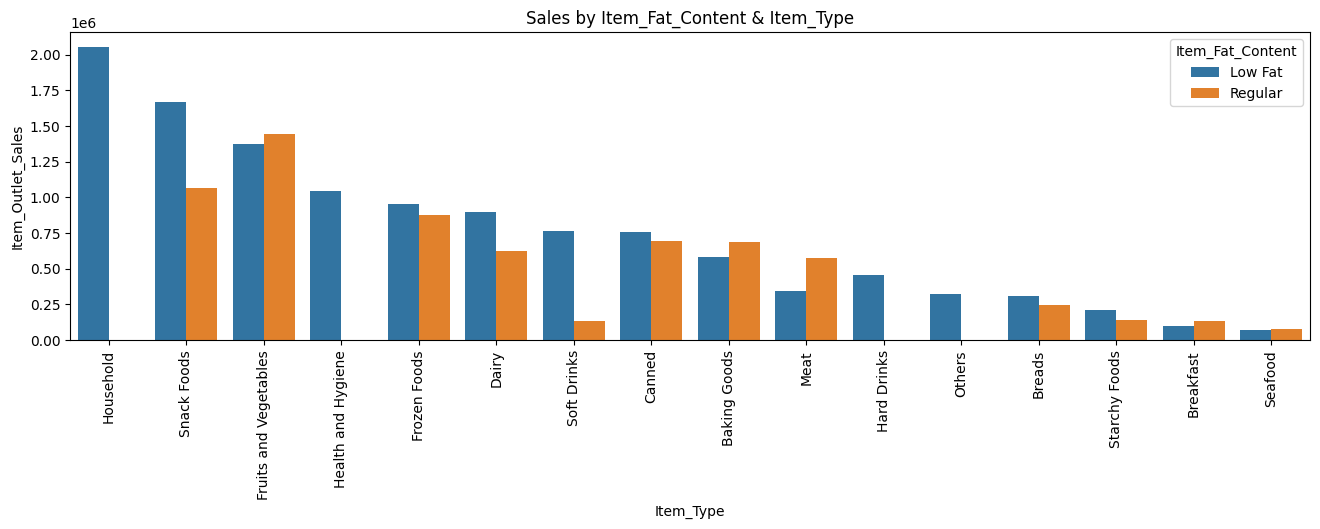

In [31]:
temp_df1 = df.groupby(['Item_Fat_Content','Item_Type'])['Item_Outlet_Sales'].sum().to_frame().reset_index().sort_values(by='Item_Outlet_Sales',ascending=False)

plt.figure(figsize=(16,4))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=temp_df1)
plt.xticks(rotation=90)
plt.title("Sales by Item_Fat_Content & Item_Type")
plt.show()

`Observation :`

1. Above chart, shows us that in Household Item_type there is no consumption of regular items,Low fat items are more consumed compared to other types of items
2. Low fat item are most consumed products however in Fruits and vegetable , we see that regular item are at higher side,same with baking goods & Meat products
3. We can conclude that low fat items are man-made and regular items are more natural / organic , which have more consumption

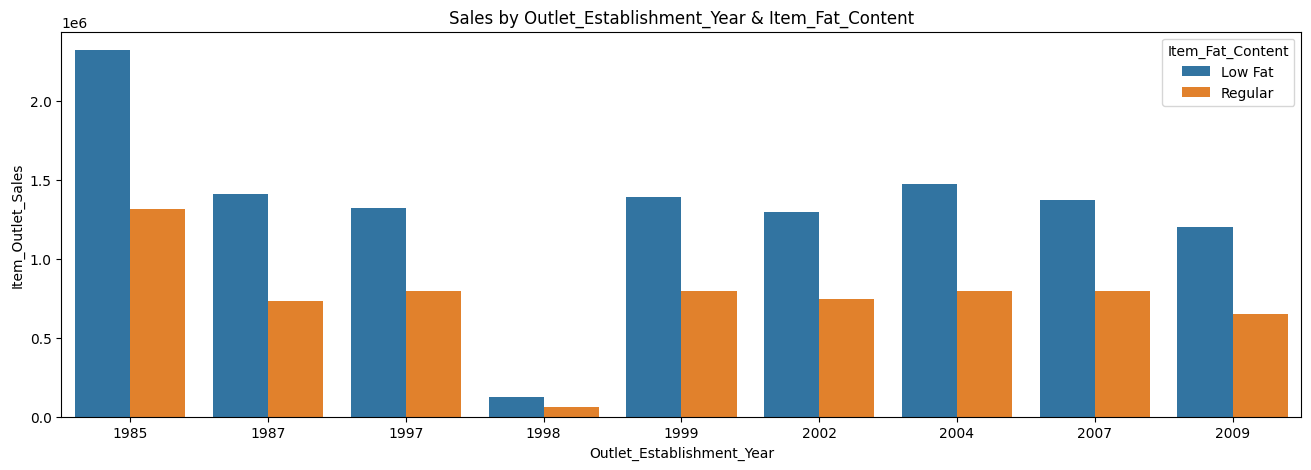

In [32]:
temp_df2 = df.groupby(['Outlet_Establishment_Year','Item_Fat_Content'])['Item_Outlet_Sales'].sum().to_frame().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=temp_df2)
plt.title("Sales by Outlet_Establishment_Year & Item_Fat_Content")
plt.show()


`Observation :`

1. we have already estblished that most consumed products are Low fat item.
2. Most of the sales recorded in outlets which are established in 1985 , the outlets which establishment post 1985 have similar sales however outlets estblished in year 1998 has the lowest sales

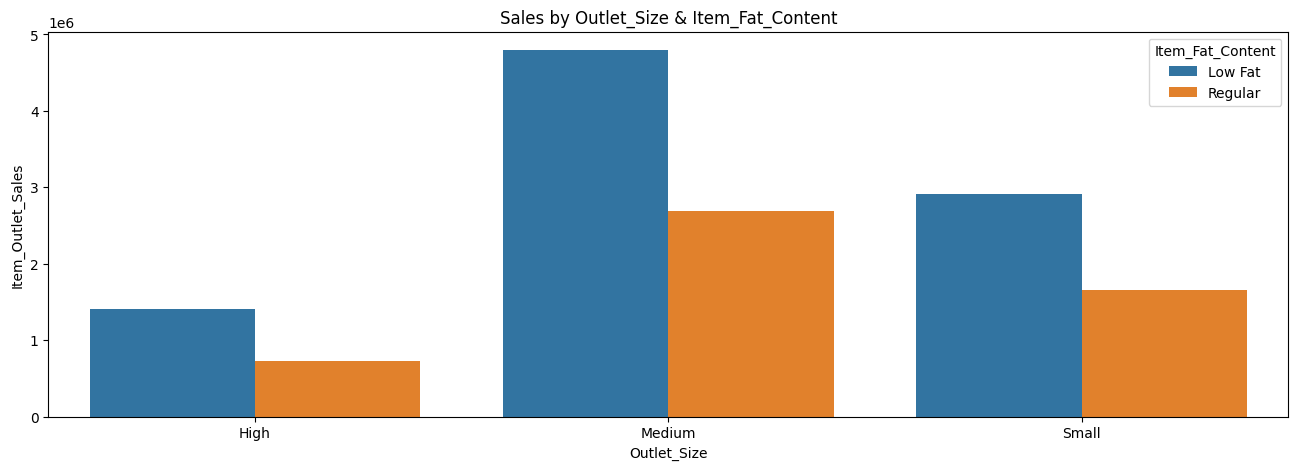

In [33]:
temp_df3 = df.groupby(['Outlet_Size','Item_Fat_Content'])['Item_Outlet_Sales'].sum().to_frame().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=temp_df3)
plt.title("Sales by Outlet_Size & Item_Fat_Content")
plt.show()


`Observation :`

1. Medium size of oulets has most sales followed by small and High 

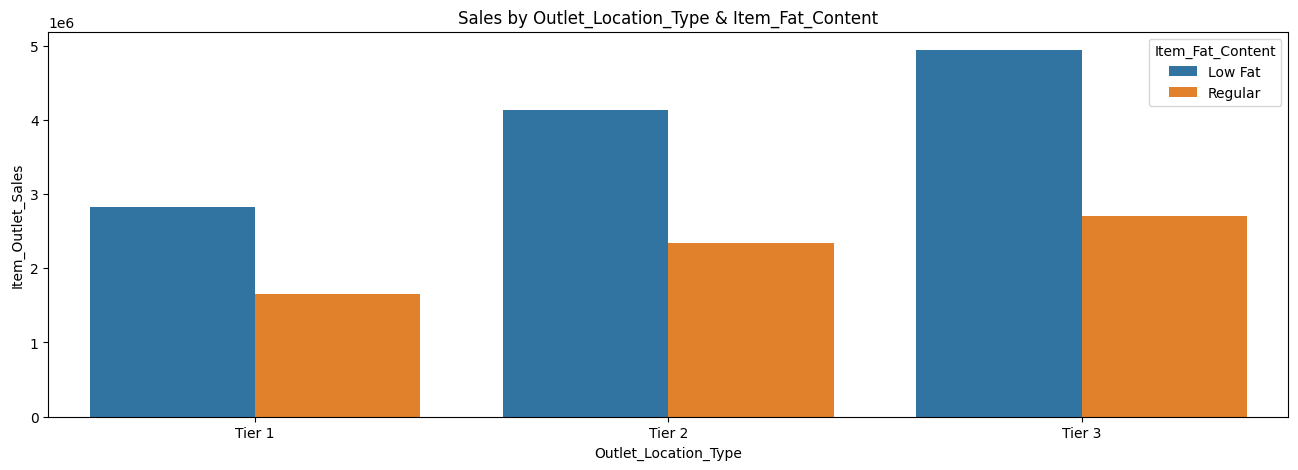

In [34]:
temp_df4 = df.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum().to_frame().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=temp_df4)
plt.title("Sales by Outlet_Location_Type & Item_Fat_Content")
plt.show()


`Observations :`

1. Tier3 location is leading in sales_revenue followed by Tier2 and Tier1 locations

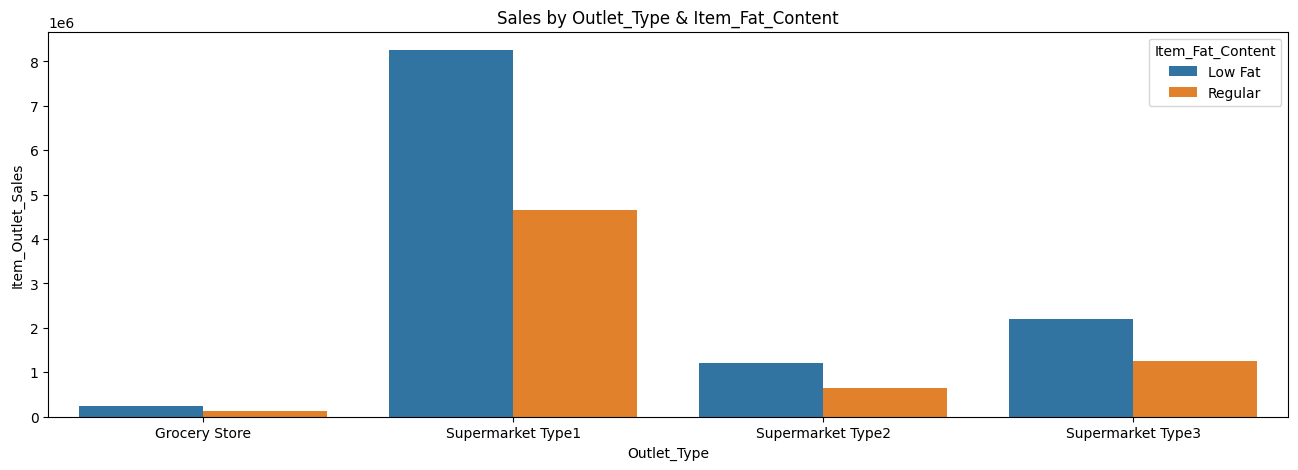

In [35]:
temp_df5 = df.groupby(['Outlet_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum().to_frame().reset_index()
plt.figure(figsize=(16,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',data=temp_df5)
plt.title("Sales by Outlet_Type & Item_Fat_Content")
plt.show()


`Observation :`

1. Supermarket Type1 is has the highest sales revenue and Grocery store has the lowest sales

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


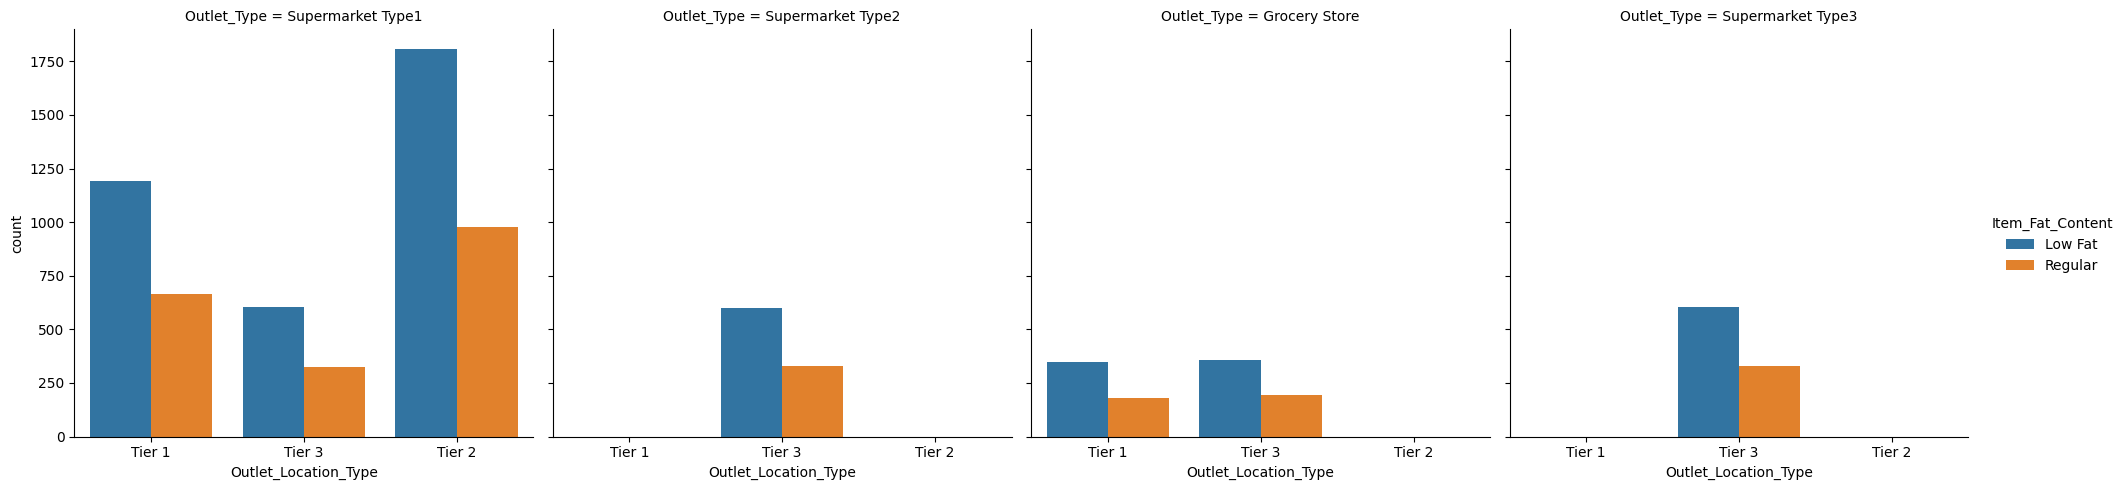

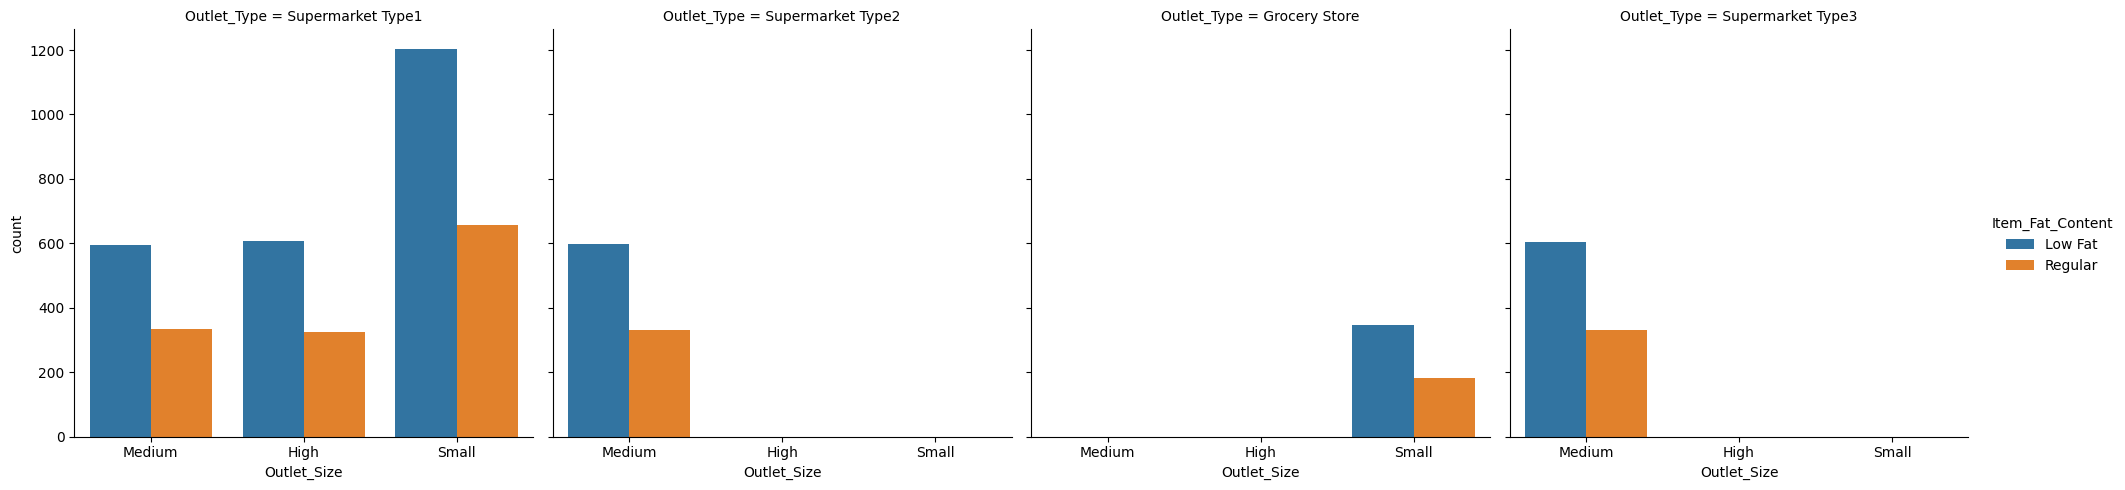

In [37]:
#sns.countplot(x='Outlet_Location_Type',hue='Item_Fat_Content',col='Outlet_Type',data=df)
sns.catplot(x ='Outlet_Location_Type', hue ='Item_Fat_Content',kind ='count', col ='Outlet_Type', data = df)
sns.catplot(x ='Outlet_Size', hue ='Item_Fat_Content',kind ='count', col ='Outlet_Type', data = df)